<a href="https://colab.research.google.com/github/mbalamanikandan/myfirstgithub/blob/master/NN_DNN_Autonomous_Vehicles_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import the data

In [7]:
#Mount the drive 
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
import pandas as pd
import numpy as np
import h5py

In [9]:
data = h5py.File('/content/drive/MyDrive/AIML/NN_Project/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [10]:
# Referemce https://www.christopherlovell.co.uk/blog/2016/04/27/h5py-intro.html
data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [11]:
#Read test, train and validation data
xtest = data.get('/X_test')
xtrain = data.get('/X_train')
x_val = data.get('/X_test')
ytest = data.get('/y_test')
ytrain = data.get('/y_train')
y_val = data.get ('/y_val')

2. Data pre-processing and visualisation.

In [12]:
import matplotlib.pyplot as plt

In [13]:
#check the shapes
print ("X_test shape", xtest.shape)
print ("x_train shape", xtrain.shape)
print ("x_val shape", x_val.shape)
print ("y_test shape", ytest.shape)
print ("y_train shape", ytrain.shape)
print ("y_val shape", y_val.shape)


X_test shape (18000, 32, 32)
x_train shape (42000, 32, 32)
x_val shape (18000, 32, 32)
y_test shape (18000,)
y_train shape (42000,)
y_val shape (60000,)


2.1 Check few images

y_train: 7


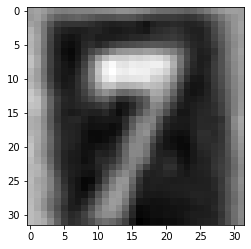

In [14]:
# check images from x_train and y_train => both must be same
n = 2
plt.imshow(xtrain [n], cmap='gray')
print ("y_train:", ytrain[2])

Y_test: 2


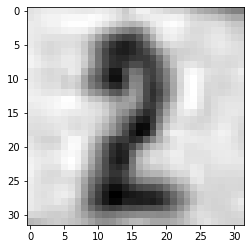

In [15]:
# check images from x_test and y_test => both must be same
n = 2
plt.imshow(xtest [n], cmap='gray')
print ("Y_test:", ytest[2])

y_val: 4


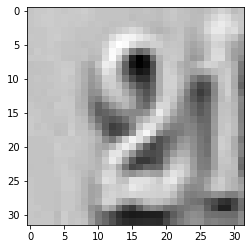

In [16]:
# check images from x_val and y_val. x_val (18000) and y_val (60000) shape is not matching. Hence, they will not be same on same index. Not useful for Model build.
n =17000
plt.imshow(x_val[n], cmap='gray')
print ("y_val:", y_val[n])

x_train, y_train, x_test and y_test will be used for building the model

In [17]:
#Find the number of labels in y_train and y_test
L=pd.DataFrame(ytrain)
L[0].value_counts()

3    4281
5    4232
2    4197
9    4196
7    4192
8    4188
4    4188
0    4186
1    4172
6    4168
Name: 0, dtype: int64

In [18]:
L=pd.DataFrame(ytest)
L[0].value_counts()

6    1832
1    1828
0    1814
8    1812
4    1812
7    1808
9    1804
2    1803
5    1768
3    1719
Name: 0, dtype: int64

In [19]:
#change the data type of x_train and y_train  to numpy array
x_train = np.array (xtrain)
y_train = np.array (ytrain)
x_test = np.array (xtest)
y_test = np.array(ytest)

In [20]:
#convert the y_train and y_test to catagorical labels
from tensorflow import keras

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

3. Design, train, tune and test a neural network image classifier

In [21]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [22]:
#initilaize the model 
model = tf.keras.models.Sequential()

In [23]:
#Reshape the data (following rehsape method does the same as Flatten). each cell has 32, 32 -> 32*32 = 1024
model.add (tf.keras.layers.Reshape( (1024,), input_shape=(32,32,)))

In [24]:
#normalize data
model.add(tf.keras.layers.BatchNormalization())

# Add Fully connected layer 
model.add(tf.keras.layers.Dense (100, activation='relu'))
model.add(tf.keras.layers.Dense (100, activation='relu'))
#model.add(tf.keras.layers.Dropout(rate=0.2))

#Add output layer 
model.add(tf.keras.layers.Dense (10, activation='softmax'))

In [25]:
#Complie the model with loss and optimizer
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
#FIt the model 
#history = model.fit (x_train, y_train, validation_data=(x_test, y_test), epochs=200, batch_size=128)
history = model.fit(x_train, y_train, epochs=500, batch_size=512, validation_split=.3, verbose=1)

Epoch 1/500
58/58 [==============================] - 2s 26ms/step - loss: 2.1682 - accuracy: 0.2436 - val_loss: 1.5035 - val_accuracy: 0.5338
Epoch 2/500
58/58 [==============================] - 2s 26ms/step - loss: 1.2321 - accuracy: 0.6256 - val_loss: 1.1599 - val_accuracy: 0.6452
Epoch 3/500
58/58 [==============================] - 2s 28ms/step - loss: 0.9993 - accuracy: 0.6975 - val_loss: 0.9452 - val_accuracy: 0.7145
Epoch 4/500
58/58 [==============================] - 2s 29ms/step - loss: 0.8574 - accuracy: 0.7413 - val_loss: 0.8526 - val_accuracy: 0.7468
Epoch 5/500
58/58 [==============================] - 2s 28ms/step - loss: 0.7814 - accuracy: 0.7655 - val_loss: 0.8052 - val_accuracy: 0.7602
Epoch 6/500
58/58 [==============================] - 1s 20ms/step - loss: 0.7153 - accuracy: 0.7855 - val_loss: 0.7937 - val_accuracy: 0.7621
Epoch 7/500
58/58 [==============================] - 1s 17ms/step - loss: 0.6902 - accuracy: 0.7871 - val_loss: 0.7829 - val_accuracy: 0.7695
Epoch 

Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of
epochs plot and write your observations on the same

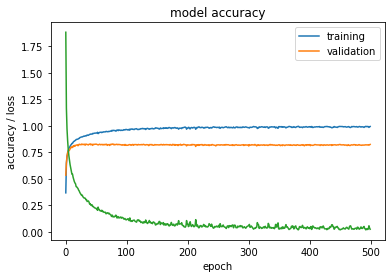

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

OBSERVATION:
As the epoc increases, the model training and validation accuracy increases but get saturated after few iteration.  The model is also over fit (training accuracy is about 98% but validation accuracy is ~82%.  This model needs further tuning to reduce the overfit. 

Overfit could be due:
- Larget batch size (Small batch size will help to overcome local minima)
- Reduce the number of weights by reducing number of neutrons
- Too many epochs [early stopping will help]. Small batch size with too many epochs also will not be useful.
- Use drop outs to reduce Over fit
- Learning Rate Optimiization to reduce over fit




In [28]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.825
Loss: 2.217


In [29]:
y_predict = model.predict(x_test)

In [30]:
y_predict[0]

array([1.2884540e-02, 9.8696822e-01, 4.1544132e-05, 3.0382524e-10,
       6.3286003e-05, 5.6760946e-10, 1.0888523e-06, 3.8375714e-05,
       3.5377645e-09, 2.8815650e-06], dtype=float32)

In [31]:
np.argmax(y_predict[0])

1

In [32]:
from sklearn import metrics
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
  
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)

[[1549   47   14   26   22    5   36   23   32   60]
 [  31 1536   30   31   43   17   22   61   29   28]
 [  16   27 1515   44   27   15    6   65   35   53]
 [  14   41   51 1329   20  113   23   36   49   43]
 [  23   57   33   22 1530   20   36   18   25   48]
 [  12   23   19   89   14 1423   82   14   47   45]
 [  49   30   21   22   35   66 1480   11   93   25]
 [  10   64   42   25   23    7    9 1586   17   25]
 [  38   35   27   49   27   40   87   16 1429   64]
 [  55   35   30   32   25   43   23   33   58 1470]]


In [33]:
print(ytest.shape)

(18000,)


In [34]:
cr=metrics.classification_report(ytest,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1814
           1       0.81      0.84      0.83      1828
           2       0.85      0.84      0.85      1803
           3       0.80      0.77      0.78      1719
           4       0.87      0.84      0.86      1812
           5       0.81      0.80      0.81      1768
           6       0.82      0.81      0.81      1832
           7       0.85      0.88      0.86      1808
           8       0.79      0.79      0.79      1812
           9       0.79      0.81      0.80      1804

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.82      0.82      0.82     18000



4. TUNE THE MODEL TO REDUCE THE OVERFIT [ Batch normalization, Drop out, smaller batch size, less epoch, early stopping]

In [78]:
#initilaize the model 
model_1 = tf.keras.models.Sequential()

In [79]:
#Reshape the data (following rehsape method does the same as Flatten). each cell has 32, 32 -> 32*32 = 1024
model_1.add (tf.keras.layers.Reshape( (1024,), input_shape=(32,32,)))

In [80]:
#normalize data
model_1.add(tf.keras.layers.BatchNormalization())

# Add Fully connected layer 
model_1.add(tf.keras.layers.Dense (50, activation='relu'))
#model_1.add(tf.keras.layers.Dropout(rate=0.2))  #Drop out layer

model_1.add(tf.keras.layers.BatchNormalization())
model_1.add(tf.keras.layers.Dense (50, activation='relu'))

model_1.add(tf.keras.layers.Dropout(rate=0.2))  #Drop out layer

#Add output layer 
model_1.add(tf.keras.layers.Dense (10, activation='softmax'))



In [81]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 )

In [82]:
#Complie the model with loss and optimizer
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) 

In [83]:
#FIt the model 
history = model_1.fit(x_train, y_train, epochs=50, batch_size=256, validation_split=.3, verbose=1, callbacks = [es])

Epoch 1/50
115/115 [==============================] - 2s 11ms/step - loss: 2.2573 - accuracy: 0.1965 - val_loss: 1.5184 - val_accuracy: 0.5423
Epoch 2/50
115/115 [==============================] - 1s 10ms/step - loss: 1.4611 - accuracy: 0.5277 - val_loss: 1.1525 - val_accuracy: 0.6591
Epoch 3/50
115/115 [==============================] - 1s 10ms/step - loss: 1.1728 - accuracy: 0.6348 - val_loss: 1.0136 - val_accuracy: 0.6969
Epoch 4/50
115/115 [==============================] - 1s 10ms/step - loss: 1.0570 - accuracy: 0.6699 - val_loss: 0.9326 - val_accuracy: 0.7165
Epoch 5/50
115/115 [==============================] - 1s 10ms/step - loss: 0.9687 - accuracy: 0.6960 - val_loss: 0.8592 - val_accuracy: 0.7413
Epoch 6/50
115/115 [==============================] - 1s 9ms/step - loss: 0.9068 - accuracy: 0.7185 - val_loss: 0.8304 - val_accuracy: 0.7517
Epoch 7/50
115/115 [==============================] - 1s 10ms/step - loss: 0.8593 - accuracy: 0.7342 - val_loss: 0.7860 - val_accuracy: 0.7637


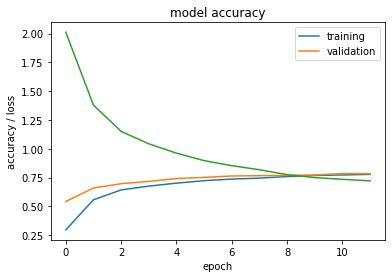

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [86]:
loss, acc = model_1.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.789
Loss: 0.712


In [87]:
#FIt the model -> without early stopping
history = model_1.fit(x_train, y_train, epochs=50, batch_size=512, validation_split=.3, verbose=1)

Epoch 1/50
58/58 [==============================] - 1s 16ms/step - loss: 0.6572 - accuracy: 0.7973 - val_loss: 0.6870 - val_accuracy: 0.7941
Epoch 2/50
58/58 [==============================] - 1s 15ms/step - loss: 0.6377 - accuracy: 0.8015 - val_loss: 0.6898 - val_accuracy: 0.7937
Epoch 3/50
58/58 [==============================] - 1s 15ms/step - loss: 0.6226 - accuracy: 0.8089 - val_loss: 0.6707 - val_accuracy: 0.7995
Epoch 4/50
58/58 [==============================] - 1s 15ms/step - loss: 0.6202 - accuracy: 0.8090 - val_loss: 0.6716 - val_accuracy: 0.8000
Epoch 5/50
58/58 [==============================] - 1s 15ms/step - loss: 0.6148 - accuracy: 0.8094 - val_loss: 0.6806 - val_accuracy: 0.7957
Epoch 6/50
58/58 [==============================] - 1s 15ms/step - loss: 0.6087 - accuracy: 0.8105 - val_loss: 0.6507 - val_accuracy: 0.8074
Epoch 7/50
58/58 [==============================] - 1s 15ms/step - loss: 0.5982 - accuracy: 0.8157 - val_loss: 0.6678 - val_accuracy: 0.8021
Epoch 8/50
58

In [89]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_14 (Dense)             (None, 50)                51250     
_________________________________________________________________
batch_normalization_10 (Batc (None, 50)                200       
_________________________________________________________________
dense_15 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

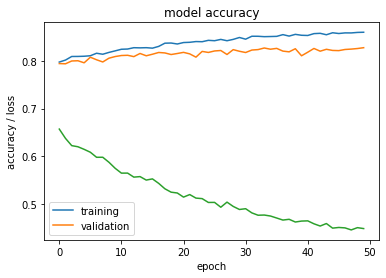

In [90]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

OBSERVATION:[link text](https://)
1.  As the epoc increases, the model is becoming overvit (training and validaiton accuracy gap increases)


In [91]:
loss, acc = model_1.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.831
Loss: 0.604


In [96]:
### Batch 128 and Early stopping
#FIt the model 
history = model_1.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=.3, verbose=1, callbacks = [es])

Epoch 1/50
230/230 [==============================] - 1s 6ms/step - loss: 0.4755 - accuracy: 0.8501 - val_loss: 0.5756 - val_accuracy: 0.8374
Epoch 2/50
230/230 [==============================] - 1s 6ms/step - loss: 0.4644 - accuracy: 0.8517 - val_loss: 0.5738 - val_accuracy: 0.8372
Epoch 3/50
230/230 [==============================] - 1s 6ms/step - loss: 0.4600 - accuracy: 0.8535 - val_loss: 0.5724 - val_accuracy: 0.8382
Epoch 4/50
230/230 [==============================] - 1s 6ms/step - loss: 0.4580 - accuracy: 0.8529 - val_loss: 0.5738 - val_accuracy: 0.8390
Epoch 00004: early stopping


In [97]:
loss, acc = model_1.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.840
Loss: 0.567


In [99]:
### Batch 128 and Early stopping with initial model with lot of Neurons. (clearly shows overfitting)
#FIt the model 
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=.3, verbose=1, callbacks = [es])

Epoch 1/50
230/230 [==============================] - 2s 7ms/step - loss: 1.0073 - accuracy: 0.8582 - val_loss: 2.2282 - val_accuracy: 0.7949
Epoch 2/50
230/230 [==============================] - 2s 7ms/step - loss: 0.3886 - accuracy: 0.9171 - val_loss: 2.1468 - val_accuracy: 0.8039
Epoch 3/50
230/230 [==============================] - 2s 7ms/step - loss: 0.2436 - accuracy: 0.9384 - val_loss: 2.0921 - val_accuracy: 0.8093
Epoch 4/50
230/230 [==============================] - 2s 7ms/step - loss: 0.2042 - accuracy: 0.9445 - val_loss: 2.0923 - val_accuracy: 0.8093
Epoch 00004: early stopping


5. TUNE THE MODEL with just one Dense layer with 1024 neurons

In [106]:
#initilaize the model 
model_2 = tf.keras.models.Sequential()

#Reshape the data (following rehsape method does the same as Flatten). each cell has 32, 32 -> 32*32 = 1024
model_2.add (tf.keras.layers.Reshape( (1024,), input_shape=(32,32,)))


#normalize data
model_2.add(tf.keras.layers.BatchNormalization())

# Add Fully connected layer 
model_2.add(tf.keras.layers.Dense (1024, activation='relu'))
model_2.add(tf.keras.layers.Dropout(rate=0.2))  #Drop out layer

#Add output layer 
model_2.add(tf.keras.layers.Dense (10, activation='softmax'))


In [107]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 )


#Complie the model with loss and optimizer
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) 

In [108]:

#FIt the model 
history = model_2.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=.3, verbose=1, callbacks = [es])

Epoch 1/50
230/230 [==============================] - 8s 32ms/step - loss: 2.2023 - accuracy: 0.3671 - val_loss: 1.0782 - val_accuracy: 0.6753
Epoch 2/50
230/230 [==============================] - 7s 31ms/step - loss: 1.1084 - accuracy: 0.6626 - val_loss: 0.9090 - val_accuracy: 0.7304
Epoch 3/50
230/230 [==============================] - 7s 31ms/step - loss: 0.8972 - accuracy: 0.7267 - val_loss: 0.7611 - val_accuracy: 0.7759
Epoch 4/50
230/230 [==============================] - 7s 30ms/step - loss: 0.7908 - accuracy: 0.7594 - val_loss: 0.7141 - val_accuracy: 0.7937
Epoch 5/50
230/230 [==============================] - 7s 31ms/step - loss: 0.7163 - accuracy: 0.7821 - val_loss: 0.7097 - val_accuracy: 0.7914
Epoch 6/50
230/230 [==============================] - 7s 31ms/step - loss: 0.6770 - accuracy: 0.7973 - val_loss: 0.6910 - val_accuracy: 0.8063
Epoch 7/50
230/230 [==============================] - 7s 31ms/step - loss: 0.6318 - accuracy: 0.8101 - val_loss: 0.6656 - val_accuracy: 0.8126

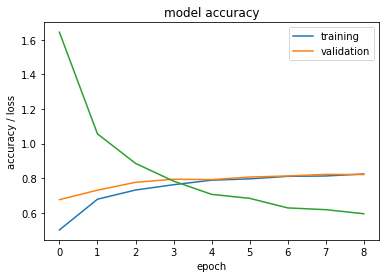

In [109]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [111]:
loss, acc = model_2.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.815
Loss: 0.670


OBSERVATION:
1. Batch size, number of neurons, number of Dense layer, Epocs, Batch size -=> all affects the Model performance
2. Correct combination of above said parameters will lead to model with best fit 
3. With tuning demonstrated above, model 1 (2 dense layer, having 50 neurons, with batch normlaizaiton and drop out) gave better accuracy (0.84) and loss (0.567) when fit was performed with batch size of 128. The same model with different batch size (512 and 1024 didn't provide better results)
